# Predicting Wine Quality 

Authors:

Atiyeh Tahavorgar - 202092451 - atahavorgar@mun.ca

Seyed Mohammad Amin Taheri Ghahfarokhi - 202193514 - ataherighahf@mun.ca


In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set_theme()


In [310]:
# Set displayed max rows and columns for pandas to display dataframes better
pd.set_option('display.max_columns', None)
pd.reset_option('max_columns')


# Part 1 - Dataset Presentation (15 marks)

## Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):

1. fixed acidity = tartaric acid - g / dm^3
2. volatile acidity = acetic acid - g / dm^3
3. citric acid = g / dm^3
4. residual sugar = g / dm^3
5. chlorides = sodium chloride - g / dm^3
6. free sulfur dioxide = mg / dm^3
7. total sulfur dioxide = mg / dm^3
8. density = g / cm^3
9. pH
10.  sulphates = potassium sulphate - g / dm3
11.  alcohol = % by volume

**Output variable (based on sensory data):**
1. quality (score between 0 and 10)

## Data Set Information:

The dataset is related to white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In this dataset we will predict wine quality. The quality data is now 0 to 10. We change it to 0 and 1 for Bad and Good quality wine. **For quality score > 6, it's good and score <= 6 is bad.**

- ✅ Generation of attribute’s descriptors for all variables.
- ✅ Table for attribute info
- ✅ plots to hint data distribution and discuss results
- ✅ justify plots
- ✅ missing values & outliers? two attr must have 15 % missing and 4% outliers.
- ✅ delete the outliers



In [311]:
df = pd.read_csv("winequality-white.csv", sep=";")


In [312]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


### Discussing and justification of histograms
Histograms will tell us the distribution for each attribute and will give us hints to how to normalize and scale each attribute. Most of the attributes have a normal distribution. Some of them need normalizing such as **free sulfur dioxide** and **chlorides**.


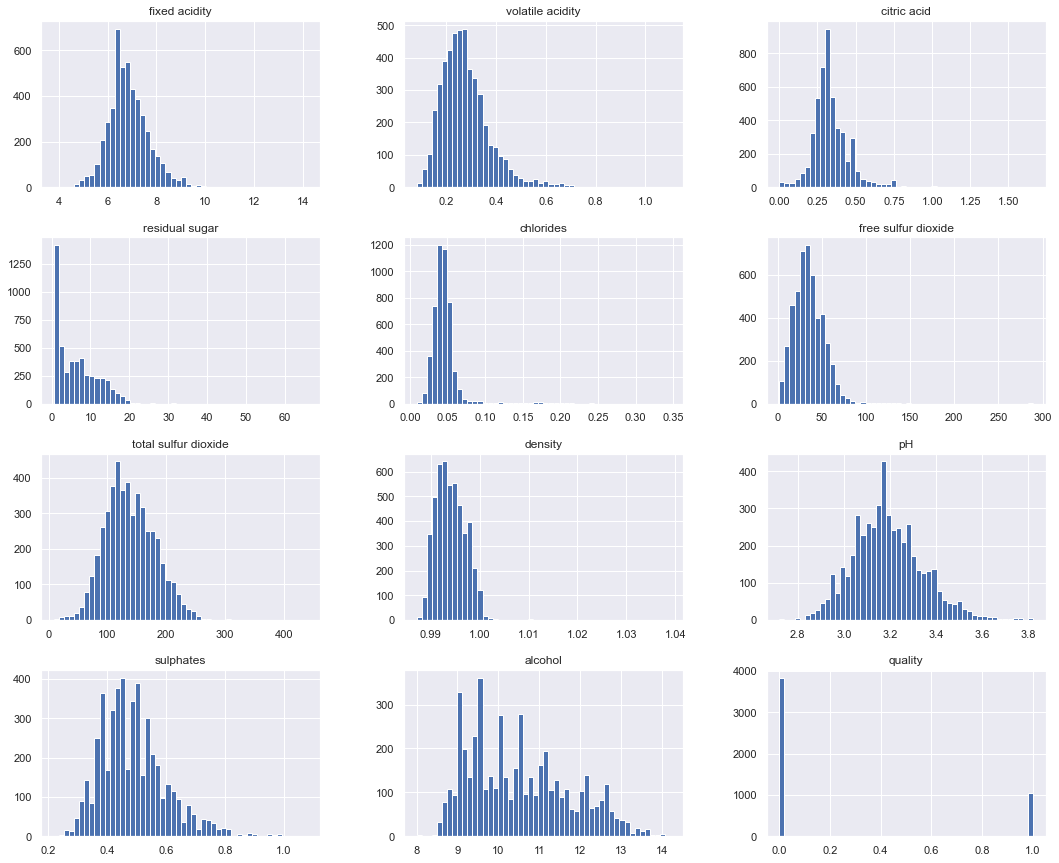

In [313]:
y = df[df.columns[-1]]
# make targets into binary
y = np.where(y > 6, 1, 0)
df[df.columns[-1]] = y

# plot distribution of all features
df.hist(bins=50, figsize=(18, 15))
plt.show()


### Discuss attributes distributions (Violin plot)
As you see above some attributes contribute to the classification as they have different distributions for different classes. But some other don't have a significant difference. Violin plots are used to visualize data distributions, displaying the range, median, and distribution of the data

In [314]:
def draw_multivalent_plot(dataset, rows, cols, plot_type):
    column_names = dataset.columns.values
    number_of_column = len(column_names)
    fig, axes = plt.subplots(rows, cols, figsize=(16, 16))

    counter = 0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(
                    x='quality', y=column_names[counter], data=dataset, ax=axes[i][j])
            elif 'box' in plot_type:
                sns.boxplot(
                    x='quality', y=column_names[counter], data=dataset, ax=axes[i][j])
            elif 'point' in plot_type:
                sns.pointplot(
                    x='quality', y=column_names[counter], data=dataset, ax=axes[i][j])
            elif 'bar' in plot_type:
                sns.barplot(
                    x='quality', y=column_names[counter], data=dataset, ax=axes[i][j])

            counter += 1
            if counter == (number_of_column-1,):
                break


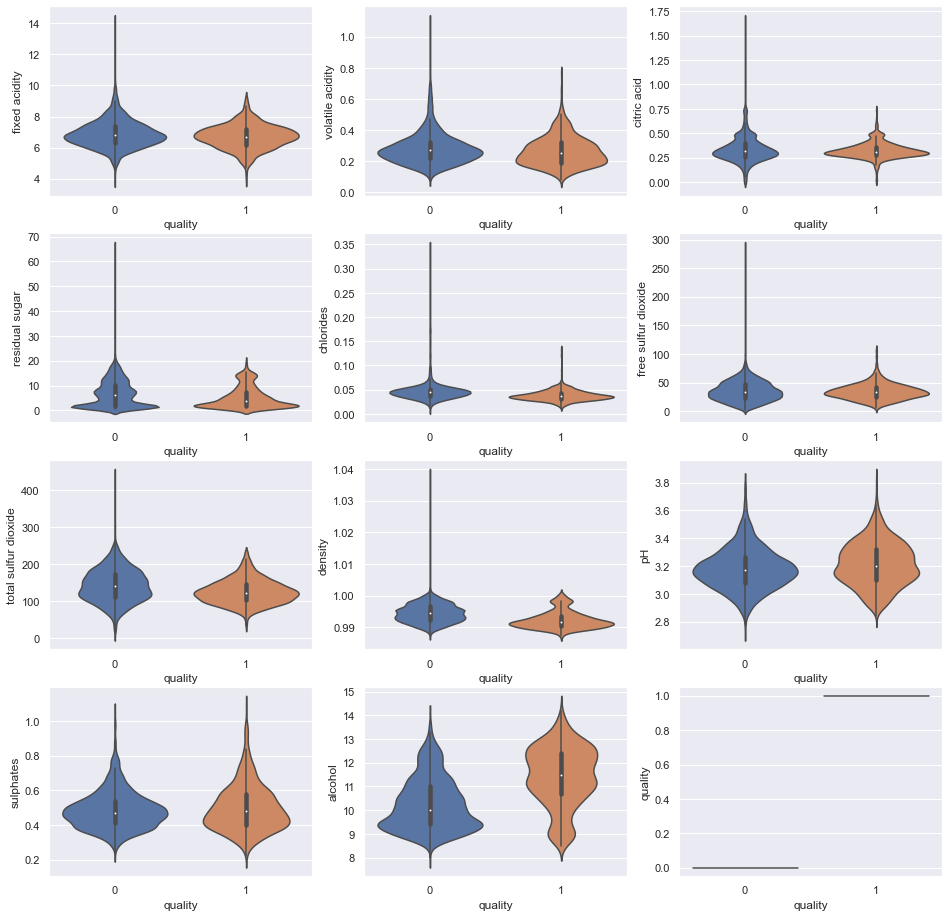

In [315]:
draw_multivalent_plot(df, 4, 3, 'violin')


### Creation of missing data

In [316]:
# how many missing values in each column
print(df.isnull().sum())

print("DataFrame shape", df.shape)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
DataFrame shape (4898, 12)


As we don't have any missing data here, we create some missing data randomly for random columns. 10% of the data will contain missing values for 2 columns.

In [317]:
# np random np seed
np.random.seed(0)

# Create Nan values for 2 randomly sliced columns 10% of the data
for i in range(2):
    list_of_cols_except_target = list(df.columns[:-1])
    random_col = list_of_cols_except_target[np.random.randint(
        len(list_of_cols_except_target))]
    df.loc[np.random.choice(df.index, size=int(
        len(df) * 0.10), replace=False), random_col] = np.nan


In [318]:
# See that we added some misssing values
print(df.isnull().sum())

print("DataFrame shape", df.shape)


fixed acidity             0
volatile acidity          0
citric acid             489
residual sugar            0
chlorides                 0
free sulfur dioxide     489
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64
DataFrame shape (4898, 12)


### Separating missing values

In [319]:
# Create a new dataframe with only rows that have missing values
df_missing = df[df.isnull().any(axis=1)]

# delete missing values
df.dropna(inplace=True)

# See that all missing values are gone
print(df.isnull().sum())

print("Real DataFrame shape", df.shape)
print("Missing DataFrame shape", df_missing.shape)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Real DataFrame shape (3970, 12)
Missing DataFrame shape (928, 12)


### Detecting and Deleting outliers

In [320]:
dim1, dim2 = df.shape
# Delete outliers based on feature values for all rows and features with IQR if it's bigger than 2 times of the IQR.
for i in range(len(df.columns) - 1):
    q1, q3 = np.percentile(df.iloc[:, i], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 3)
    upper_bound = q3 + (iqr * 3)
    df.drop(df[df.iloc[:, i] < lower_bound].index, inplace=True)
    df.drop(df[df.iloc[:, i] > upper_bound].index, inplace=True)


In [321]:
print("Number of deleted data for outliers", dim1 - df.shape[0])


Number of deleted data for outliers 171


# Part 2 – Data scaling (25 marks)

- ✅ Choose 3 data scaling techniques (one of them should change data distribution)
- ✅ plot side by side and discuss


Data scalers justifications:


**MinMaxScaler**: This scaler the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution. As you can see, the data distribution is not changed. 


**RobustScaler**: This scaler is similar to MinMaxScaler but it uses median to replace the zero values. Robust Scaler is used to scale the data to a given range. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution. You can see in the plots that the data distribution is not changed.


**QuantileTransformer**: This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers, this is therefore a robust preprocessing scheme. As shown in plots, the data distributions are changed.

In [322]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]


In [323]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, QuantileTransformer

val_cols_names = df.columns[:-1]
val_cols_names = list(val_cols_names)


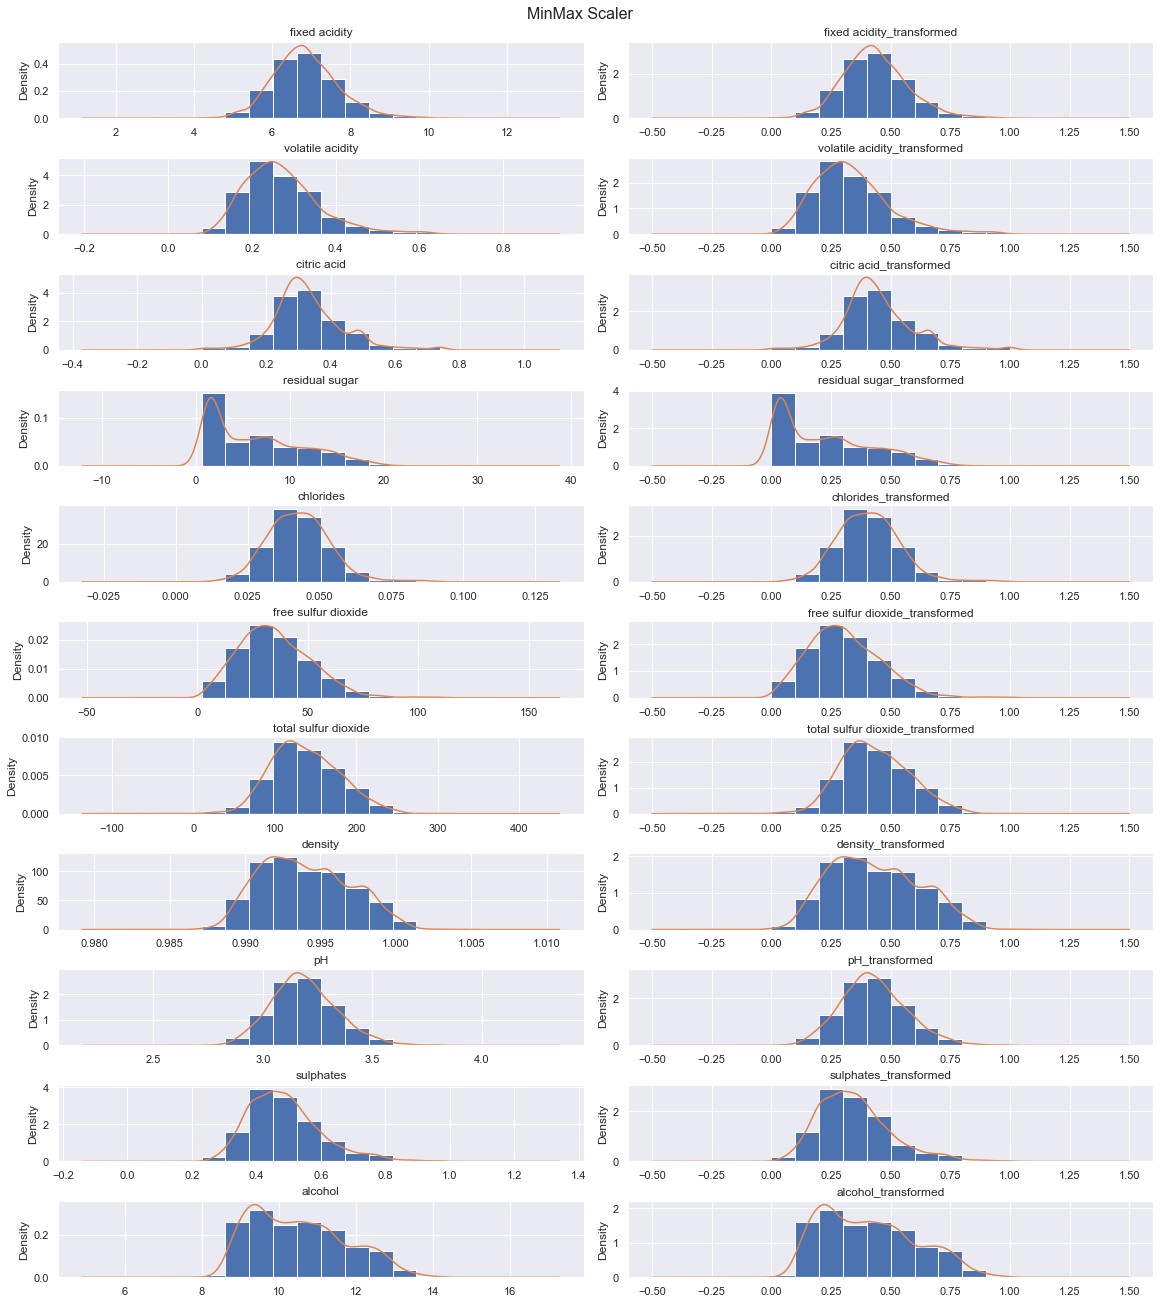

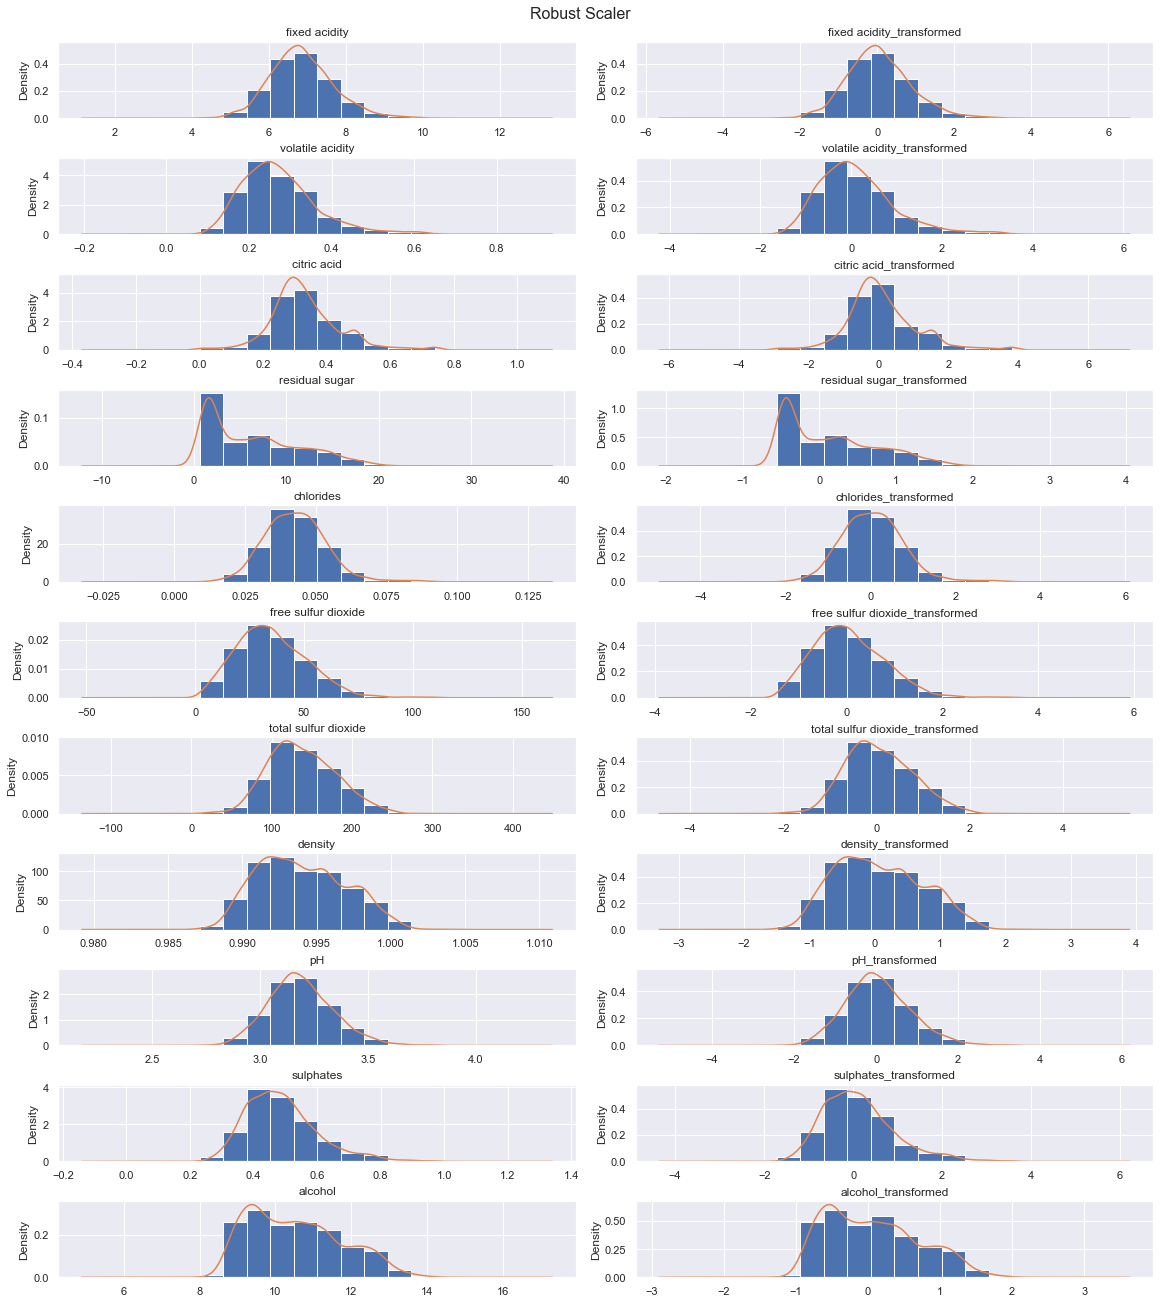

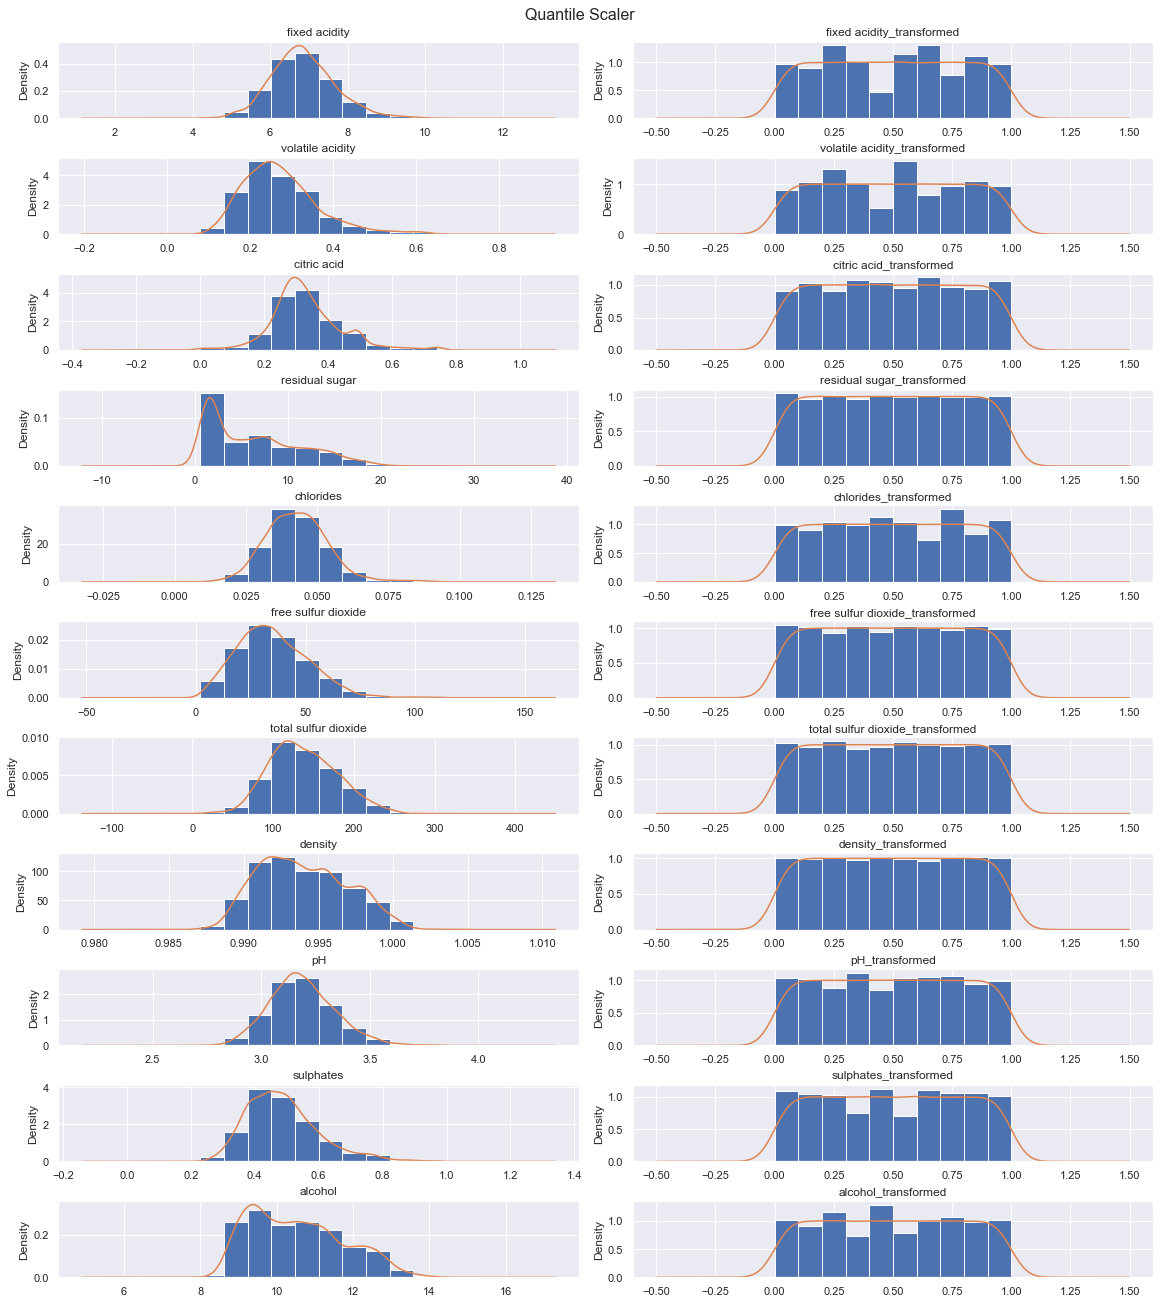

In [324]:
def plot(x, columns, df_transformed, fig_title):
    fig, axs = plt.subplots(len(columns), 2, figsize=(
        16, 18), constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0
    for c in columns:
        x[c].hist(ax=axs[i], density=True)  # normalizes the density
        x[c].plot.density(ax=axs[i], title=c)
        df_transformed[c].hist(ax=axs[i+1], density=True,
                               stacked=True)  # normalizes the density
        df_transformed[c].plot.density(
            ax=axs[i+1], title=str(c+'_transformed'))
        i += 2


min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
quantile_scaler = QuantileTransformer()


df1 = min_max_scaler.fit_transform(x)
df2 = robust_scaler.fit_transform(x)
df3 = quantile_scaler.fit_transform(x)

min_max_scaler_df = pd.DataFrame(df1, index=x.index, columns=x.columns)
robust_scaler_df = pd.DataFrame(df2, index=x.index, columns=x.columns)
quantile_scaler_df = pd.DataFrame(df3, index=x.index, columns=x.columns)

plot(x, val_cols_names, min_max_scaler_df, 'MinMax Scaler')

plot(x, val_cols_names, robust_scaler_df, 'Robust Scaler')

plot(x, val_cols_names, quantile_scaler_df, 'Quantile Scaler')


# Part 3 – Handling missing data and outliers (25 marks)
- ✅ choose from panada (bfill or ffill) plot and discuss 
- ✅ create models 2 classifiers (linear and knn) & validate and decide which one to choose
- ✅ best combiniation of model and data scaling  & discuss
- ✅ justify eval metric
- ✅ fill missing data with classifier (Ask in Discord)


In [325]:
# Shuffle df_missing
df_missing = df_missing.sample(frac=1).reset_index(drop=True)

# fill missing values with bfill
df_missing.fillna(method='ffill', inplace=True)

# concat df and df_missing and shuffle
df_concat = pd.concat([df, df_missing])  # concat
df_concat = df_concat.sample(frac=1).reset_index(drop=True)  # shuffle


In [326]:
df_concat.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             4
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Problem with ffill
We plot data distribution of the columns that had missing values and filled them ffill function. As it's visible, ffill changes the data distribution severly and thus makes the prediction of target value harder. 

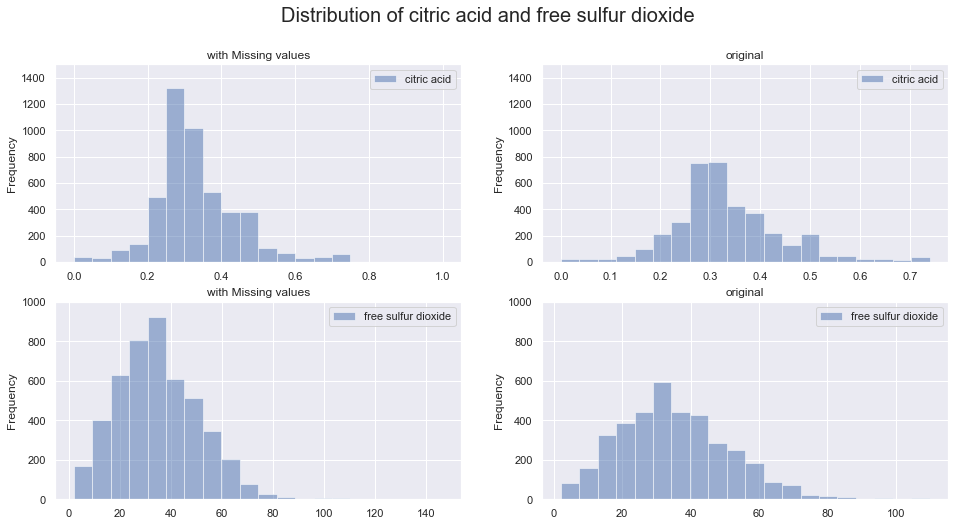

In [327]:
# plot citric acid and sulfur dioxide columns distribution for df_concat and df
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
axs = axs.flatten()
df_concat[['citric acid']].plot.hist(
    alpha=0.5, bins=20, figsize=(16, 8), ax=axs[0], title='with Missing values', ylim=(0, 1500))

df[['citric acid']].plot.hist(
    alpha=0.5, bins=20, figsize=(16, 8), ax=axs[1], title='original', ylim=(0, 1500))

df_concat[['free sulfur dioxide']].plot.hist(
    alpha=0.5, bins=20, figsize=(16, 8), ax=axs[2], title='with Missing values', ylim=(0, 1000))

df[['free sulfur dioxide']].plot.hist(
    alpha=0.5, bins=20, figsize=(16, 8), ax=axs[3], title='original', ylim=(0, 1000))

fig.suptitle('Distribution of citric acid and free sulfur dioxide', fontsize=20)
fig.show()


In [328]:
X_citric = df.drop(['citric acid'], axis=1).reset_index(drop=True)
y_citric = df['citric acid'].reset_index(drop=True)

X_sulfur = df.drop(['free sulfur dioxide'], axis=1).reset_index(drop=True)
y_sulfur = df['free sulfur dioxide'].reset_index(drop=True)


In [329]:
y_citric


0       0.36
1       0.34
2       0.40
3       0.32
4       0.32
        ... 
3794    0.38
3795    0.29
3796    0.36
3797    0.30
3798    0.38
Name: citric acid, Length: 3799, dtype: float64

In [330]:
# disable warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

# import knn regressor

# import linear model regression


def grid_search_diff_data(X, y):
    scalers = [min_max_scaler, robust_scaler, quantile_scaler]

    for scaler in scalers:
        X_scaled = scaler.fit_transform(X)
        knn_cv = KNeighborsRegressor(n_neighbors=20)
        knn_cv = cross_val_score(knn_cv, X_scaled, y, cv=5, scoring='r2')
        print(
            f"KNN: best score for {scaler.__class__.__name__} ", knn_cv.mean())

        log_cv = LinearRegression()
        log_cv = cross_val_score(log_cv, X_scaled, y, cv=5, scoring='r2')

        print(
            f"LR: best score for {scaler.__class__.__name__}  ", log_cv.mean())


print("############################ Grid search for citric acid ############################")
grid_search_diff_data(X_citric, y_citric)
print("########################### Grid search for sulfur dioxide ##########################")
grid_search_diff_data(X_sulfur, y_sulfur)


############################ Grid search for citric acid ############################
KNN: best score for MinMaxScaler  0.07020261686372539
LR: best score for MinMaxScaler   0.029429515633017943
KNN: best score for RobustScaler  0.05913440546645517
LR: best score for RobustScaler   0.029429515633017787
KNN: best score for QuantileTransformer  0.04078663739446908
LR: best score for QuantileTransformer   0.005707043366380682
########################### Grid search for sulfur dioxide ##########################
KNN: best score for MinMaxScaler  0.3914912714337597
LR: best score for MinMaxScaler   0.4315287676828593
KNN: best score for RobustScaler  0.40199916733822416
LR: best score for RobustScaler   0.4315287676828598
KNN: best score for QuantileTransformer  0.4048248030621992
LR: best score for QuantileTransformer   0.42694674918469655


**KNN with MinMaxScaler did good for citric acid**

**Linear Regression with MinMaxScaler did good for sulfur dioxide**


In [331]:

# Transform whole data set
X_scaled = min_max_scaler.fit_transform(X_citric)
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_scaled, y_citric)
X_to_fill = df_missing.drop(['citric acid'], axis=1).reset_index(drop=True)
y_pred = knn.predict(X_to_fill)
df_missing['citric acid'] = y_pred

X_scaled = min_max_scaler.fit_transform(X_sulfur)
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_scaled, y_sulfur)
X_to_fill = df_missing.drop(
    ['free sulfur dioxide'], axis=1).reset_index(drop=True)
y_pred = knn.predict(X_to_fill)
df_missing['free sulfur dioxide'] = y_pred

# concat df_missing with df
df_concat = pd.concat([df, df_missing])


### Discuss best combination
The best combination is with MinMaxScaler and KNN for citric acid and Linear Regression for free sulfur dioxide. We tried cross validation with five folds score with r2 scoring method. 

### Justify eval metric
R2 (coefficient of determination) regression score function. Because our target value is not balanced, using r2 score will help with that. 

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

# Part 4 – Feature selection 
- ✅ define a target value to forecast = Wine quality is our target
- ✅ select 2 feature selection techniques and discuss
- ✅ define baseline model - CV 
- ✅ apply feature selection techs and compare performance /w baseline. are there improvement? Yes/no? why?


## Feature selector justification:

**f_classif**: This technique is useful in binary classification problems when the input is numerical and the output is categorical. Anova is chosen because it's computationally very fast, avoids overfitting, do not depend on the models but only features, and it's based on different statistical methods.

**mutual_info_classif**: is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. This approach is beneficial when we want to interpret easily, avoid overfitting, detect any kind of relationship, and choose a computationally efficient feature selector.

In [332]:
df_concat.reset_index(drop=True)
X = df_concat.drop(["quality"], axis=1).reset_index(drop=True)
y = df_concat["quality"].reset_index(drop=True)

X_scaled = min_max_scaler.fit_transform(X)


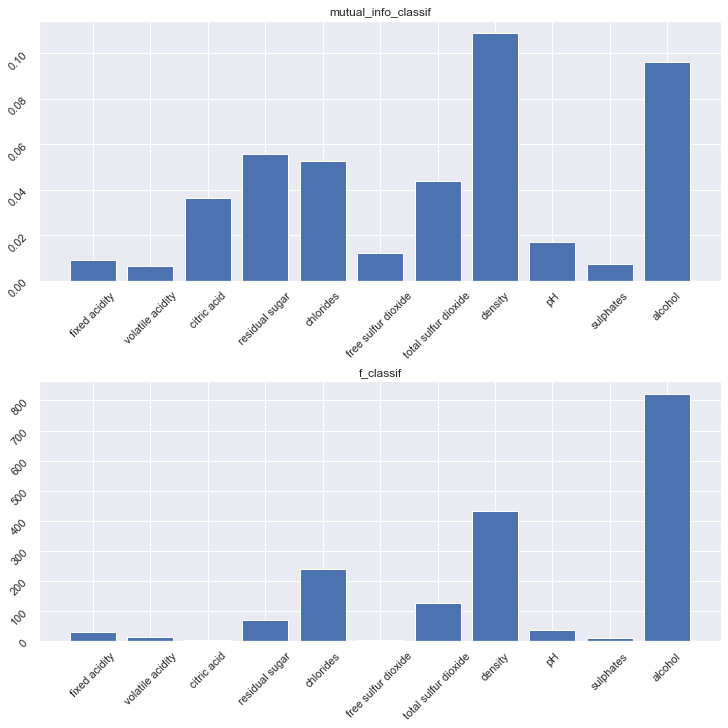

In [333]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# feature selection


def select_features(x, y, score_function):
    # configure to select all features
    sel = SelectKBest(score_func=score_function, k='all')
    # learn relationship from training data
    sel.fit(x, y)
    return sel


# feature selection
fs = select_features(X_scaled, y, mutual_info_classif)
mi = select_features(X_scaled, y, f_classif)
# plot the scores
fig, axs = plt.subplots(2, 1, figsize=(10, 10), constrained_layout=True)
axs = axs.flatten()
axs[0].bar(val_cols_names, fs.scores_)
axs[0].tick_params(labelrotation=45)
axs[0].set_title('mutual_info_classif')
axs[1].bar(val_cols_names, mi.scores_)
axs[1].tick_params(labelrotation=45)
axs[1].set_title('f_classif')
pyplot.show()


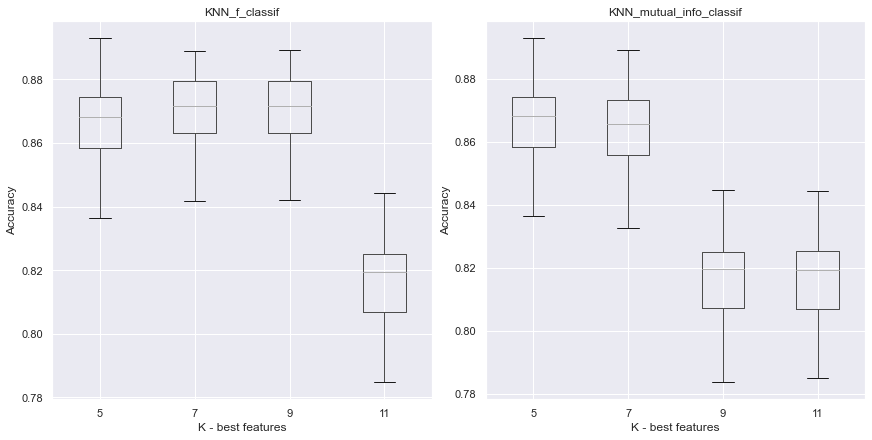

In [334]:
# Baseline model is the model with 11 features in the plot below
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# Got this from grid search (part 3)
knn_cv = KNeighborsClassifier(n_neighbors=20, weights='distance')
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)
results = cross_val_score(knn_cv, X_scaled, y, cv=rkf)

sel = SelectKBest()
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=321)

k_best = list(range(5, 12, 2))

Scoring_functions = [f_classif, mutual_info_classif]
Classifiers = [knn_cv]

fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
for scoring in Scoring_functions:
    for classifier in Classifiers:
        super_scores = []
        for k in k_best:
            sel = SelectKBest(score_func=scoring, k=k)
            X_new = sel.fit_transform(X, y)
            scores = cross_val_score(
                classifier, X_new, y, cv=cv, n_jobs=-1, scoring='roc_auc')
            super_scores.append(scores)
        to_plot_df = pd.DataFrame(super_scores, index=k_best)
        # transpose the dataframe
        to_plot_df = to_plot_df.T
        i = Scoring_functions.index(scoring)
        axs[i].set_xlabel("K - best features")
        axs[i].set_ylabel("Accuracy")
        axs[i].set_title("KNN" + "_" + scoring.__name__)
        to_plot_df.boxplot(ax=axs[i])
pyplot.show()


## Are there improvement?
Yes. Baseline model is the model with 11 features in the plot above. As apparent above, when all of the features are selected (11 features i.e. k = 11) the performance drops. But when using 9 features fom f_classif or 5 features from mutual info, we have improvement in accuracy. This is similar with the previous results from the best features plots in the previous cell. We used KNN with roc_auc which is robust to unbalanced data.As you can see there are 5 features important for mutual information in the previous cell and KNN performed really good with those 5 feature. f_classif found 9 features that are important and KNN performed really good with them.

# Acknowledgements
We wanted to thank you for the great semester. We learned a lot of technologies through this course. Have a great time. :))

Sincerely,

Amin and Atiyeh